In [1]:
import pandas as pd
import numpy as np

In [2]:
#adding in olympics csv
olympics = pd.read_csv('C:/Users/Colm/Documents/UCDPAColm-Ryan/Athlete_events.csv')

In [3]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
olympics.set_index('ID')

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN


In [5]:
#are there missing values
print(olympics.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [6]:
#replace missing values with "No medaL" - "NM"
olympics['Medal'].fillna('NM', inplace = True)

In [7]:
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


In [8]:
#are national committees linked to a unique team?
print(olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


In [9]:
#add in NOC countries
noc_country = pd.read_csv('C:/Users/Colm/Documents/UCDPAColm-Ryan/noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)
noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [10]:
# merging on NOC
olympics_merge = olympics.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [11]:
# are there NOCs without a matching country in the master?
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [12]:
# Correcting team names
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='SGP', 'Singapore', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='UNK', 'Unknown', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='TUV', 'Tuvalu', olympics_merge['Country'])

In [13]:
olympics_merge.drop('Team', axis = 1, inplace = True)
olympics_merge.rename(columns = {'Country': 'Team'}, inplace = True)

In [14]:
olympics_merge.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [15]:
print(olympics_merge)

            ID                      Name Sex   Age  Height  Weight  NOC  \
0            1                 A Dijiang   M  24.0   180.0    80.0  CHN   
1            2                  A Lamusi   M  23.0   170.0    60.0  CHN   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN  DEN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  DEN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  NED   
...        ...                       ...  ..   ...     ...     ...  ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0  POL   
271112  135570                  Piotr ya   M  27.0   176.0    59.0  POL   
271113  135570                  Piotr ya   M  27.0   176.0    59.0  POL   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0  POL   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0  POL   

              Games  Year  Season            City          Sport  \
0       1992 Summer  1992  Summ

In [16]:
# I'm taking olympics data for summer olympics only and last 50 years only 1966 to 2016
olympics_final = olympics_merge.loc[(olympics_merge['Year'] > 1966 ) & (olympics_merge['Season'] == "Summer"), :]

In [17]:
olympics_final.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NM,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NM,China
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NM,Finland
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NM,Finland
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NM,Finland


In [18]:
# olympics_final_subset: rows with all attribute details (No NaN values) (excluding Medal)
olympics_final1 = olympics_final[np.isfinite(olympics_final['Age'])]
olympics_final1 = olympics_final1[np.isfinite(olympics_final1['Weight'])]
olympics_final1 = olympics_final1[np.isfinite(olympics_final1['Height'])]
olympics_final.describe()

,ID,Age,Height,Weight,Year
count,150446.000000,149662.000000,143688.000000,143430.000000,150446.000000
mean,68080.897764,24.952693,175.746019,70.756704,1994.466187
std,39239.207023,5.652467,11.186575,15.205883,14.532663
min,1.000000,11.000000,127.000000,25.000000,1968.000000
25%,34076.000000,21.000000,168.000000,60.000000,1984.000000
50%,68655.000000,24.000000,175.000000,70.000000,1996.000000
75%,101777.750000,28.000000,183.000000,80.000000,2008.000000
max,135568.000000,71.000000,226.000000,214.000000,2016.000000


In [19]:
# Sorting data by year from 1966 to 2016 and looking at mean age
dataByYear= olympics_final.sort_values("Year")
dataByYear.head()["Age"].mean()


19.6

In [20]:

dataByYear.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
117441,59452,Raycho Khristov,M,23.0,171.0,63.0,BUL,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Horizontal Bar,NM,Bulgaria
159844,80198,Frans Mintjens,M,21.0,176.0,73.0,BEL,1968 Summer,1968,Summer,Mexico City,Cycling,Cycling Men's 100 kilometres Team Time Trial,NM,Belgium
259289,129817,Bo ke Westergren,M,18.0,174.0,66.0,SWE,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NM,Sweden
259288,129817,Bo ke Westergren,M,18.0,174.0,66.0,SWE,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Men's 100 metres Butterfly,NM,Sweden
259287,129817,Bo ke Westergren,M,18.0,174.0,66.0,SWE,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NM,Sweden


In [21]:
# what years were the olypics in this period
print("Total Editions:")
print("Season:")
print(olympics_final["Year"].unique())

Total Editions:
Season:
[1992 2012 2000 1996 2008 2016 2004 1984 1968 1972 1988 1976 1980]


In [22]:
# looking at breakdown of athletees m and f 
print("Total Male & Female Participants:\n",olympics_final["Sex"].value_counts())

Total Male & Female Participants:
 M    98595
F    51851
Name: Sex, dtype: int64


In [23]:
# Gold Medal Winners since 1956
gold_winners= olympics_final[olympics_final["Medal"]=="Gold"]
gold_winners.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway
172,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,Belarus
173,73,Luc Abalo,M,23.0,182.0,86.0,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France
174,73,Luc Abalo,M,27.0,182.0,86.0,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,France
178,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold,Cameroon


In [24]:
# Silver Medal Winners since 1956
silver_winners= olympics_final[olympics_final["Medal"]=="Silver"]
silver_winners.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,Netherlands
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia
175,73,Luc Abalo,M,31.0,182.0,86.0,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,France
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,USA
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver,Russia


In [25]:
# Bronze Medal Winners since 1956
bronze_winners= olympics_final[olympics_final["Medal"]=="Bronze"]
bronze_winners.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
91,29,Willemien Aardenburg,F,22.0,NaN,NaN,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,Italy
159,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze,Spain
161,65,Patimat Abakarova,F,21.0,165.0,49.0,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan


In [26]:
# Save top 5 medal winners
gwa = gold_winners['Name'].value_counts().sort_values(ascending=True)[-5:]
swa = silver_winners['Name'].value_counts().sort_values(ascending=True)[-5:]
bwa = bronze_winners['Name'].value_counts().sort_values(ascending=True)[-5:]

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

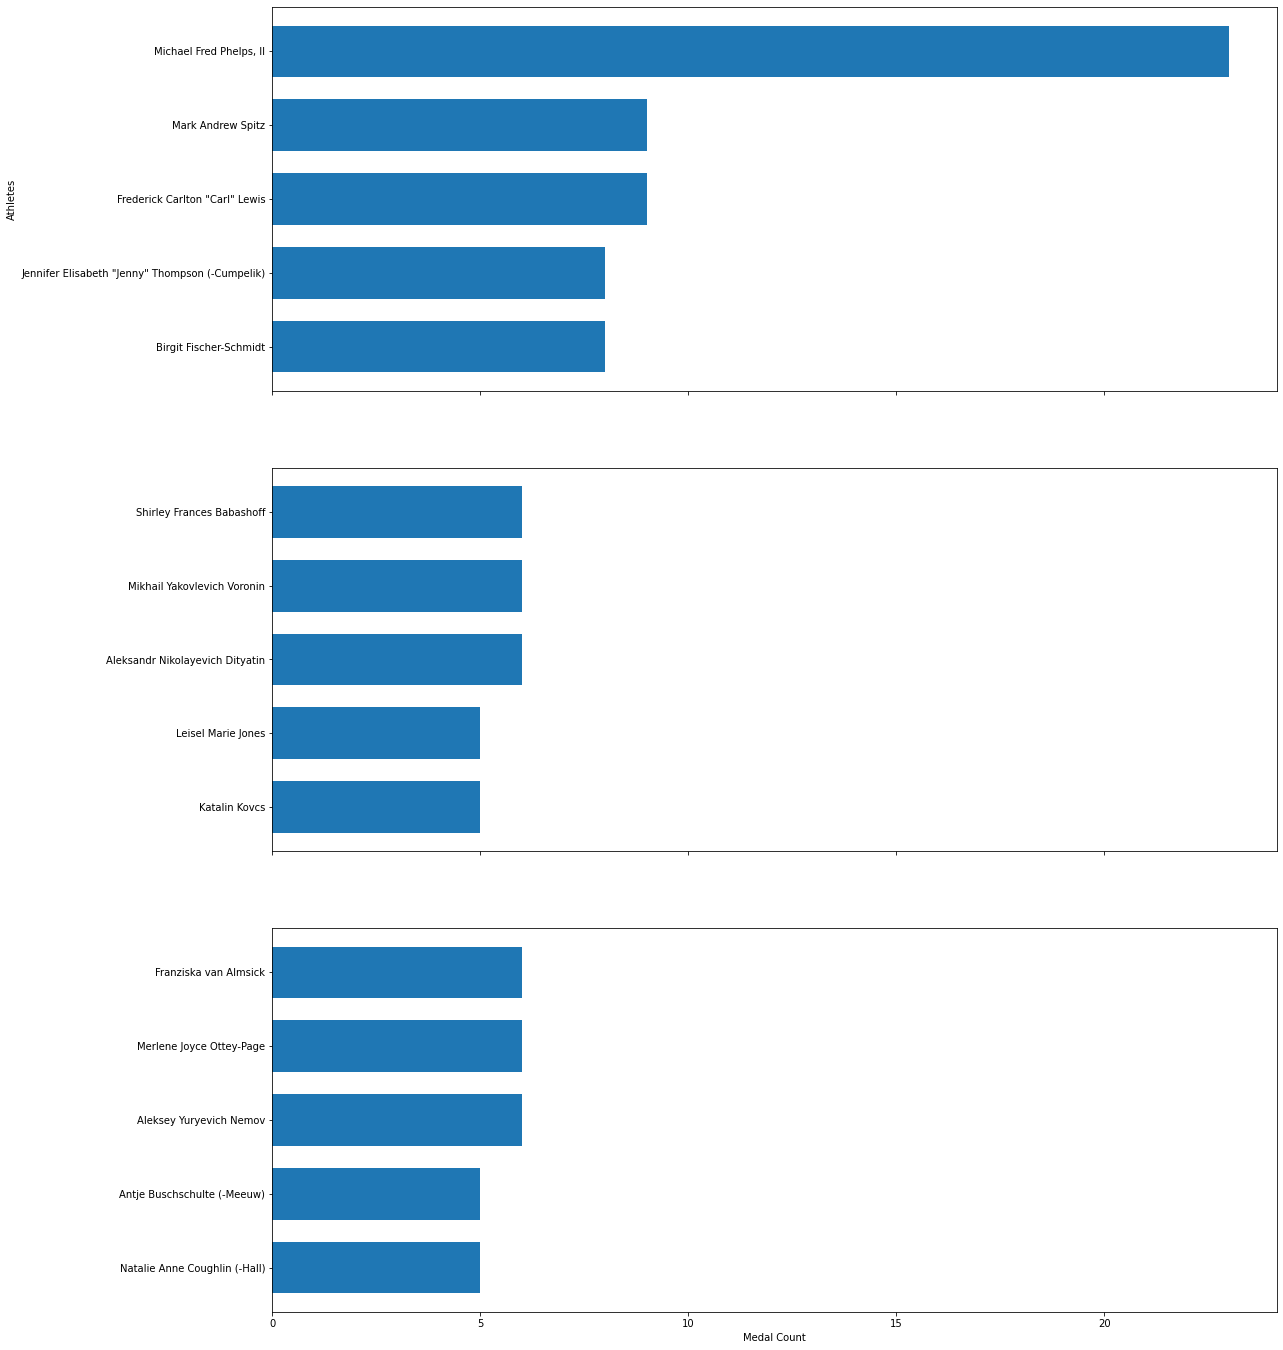

In [28]:
# Plotting top 5 gold silver bronze medal winners
plt.subplots(figsize=(18,24))
ax1 =plt.subplot(311)
gwa.plot.barh(width=.7)
ax2 = plt.subplot(312, sharex=ax1)
swa.plot.barh(width=.7)
ax3 = plt.subplot(313, sharex=ax1)
bwa.plot.barh(width=.7)

ax3.set_xlabel('Medal Count')
ax1.set_ylabel('Athletes')
plt.savefig('top_athletes')
plt.show()

In [29]:
# Gender numbers
sex_cnt= olympics_final.groupby(['Year','Sex']).size().reset_index(name='Count')
sex_cnt.head()

,Year,Sex,Count
0,1968,F,1777
1,1968,M,6811
2,1972,F,2193
3,1972,M,8111
4,1976,F,2172


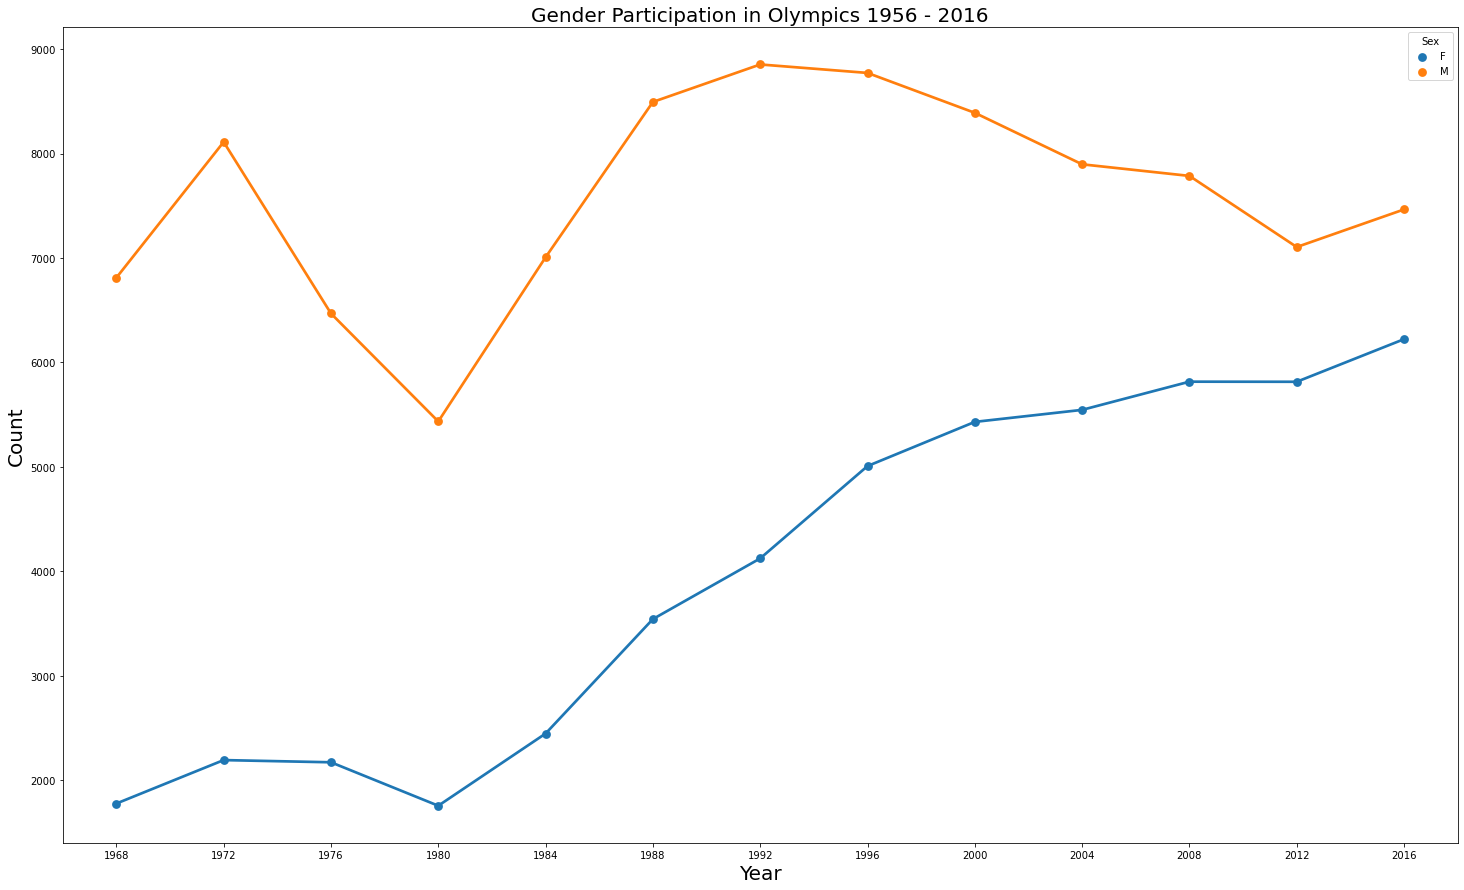

In [30]:
# DEvelopment of sex breakdown over the time period
plt.rcParams["axes.labelsize"] = 20
f, ax_s= plt.subplots(figsize=(25,15))
#sns.set_context("notebook", font_scale=0.5, rc={"font.size":8,"axes.labelsize":5})

ax_s.set_title("Gender Participation in Olympics 1956 - 2016",fontsize=20)

sns.pointplot(x="Year", y="Count", hue="Sex", data=sex_cnt, ax= ax_s)
plt.savefig('Gender_participation')
plt.show()

<AxesSubplot:xlabel='Height', ylabel='Sex'>

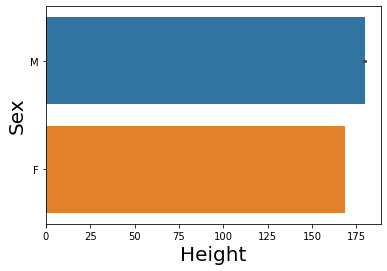

In [31]:
sns.barplot(data=olympics_final, x='Height', y='Sex')

<AxesSubplot:xlabel='Weight', ylabel='Sex'>

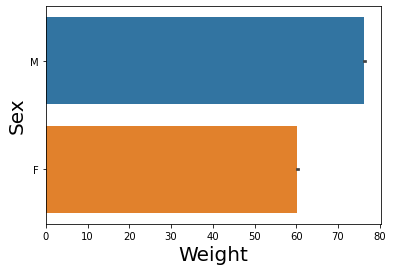

In [32]:
#turning bar plot for weight
sns.barplot(data=olympics_final, x='Weight', y='Sex')

<AxesSubplot:xlabel='Medal', ylabel='count'>

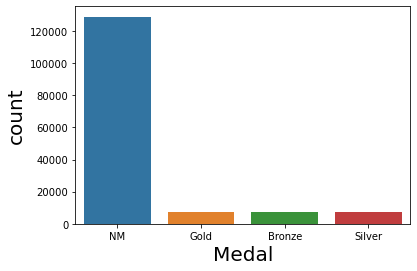

In [33]:
sns.countplot(data=olympics_final, x='Medal')

Text(0.5, 1.0, 'Medal numbers 1966 to 2016')

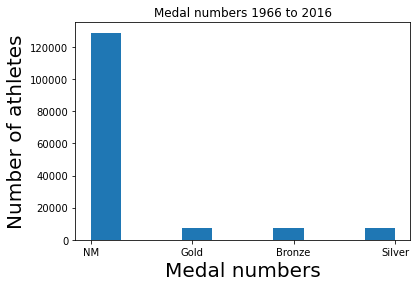

In [34]:
plt.hist(olympics_final['Medal'], bins=10)
plt.xlabel('Medal numbers')
plt.ylabel('Number of athletes')

plt.title('Medal numbers 1966 to 2016')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

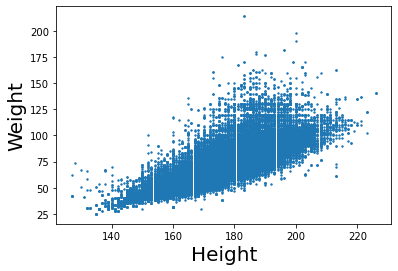

In [35]:
olympics_final.plot.scatter('Height', 'Weight', s=2)

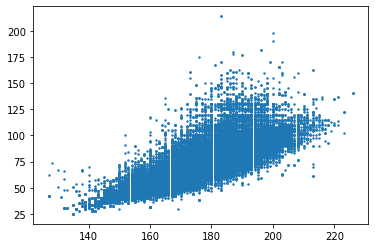

In [36]:
plt.scatter(olympics_final['Height'], olympics_final['Weight'], s=2)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

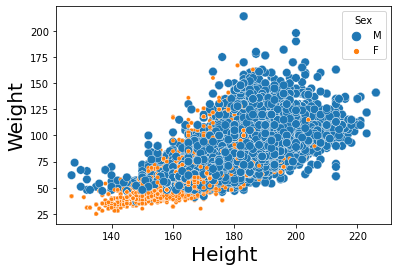

In [37]:
#including redundancy on seaborn
sns.scatterplot(data=olympics_final, x='Height', y='Weight', hue='Sex', size='Sex')

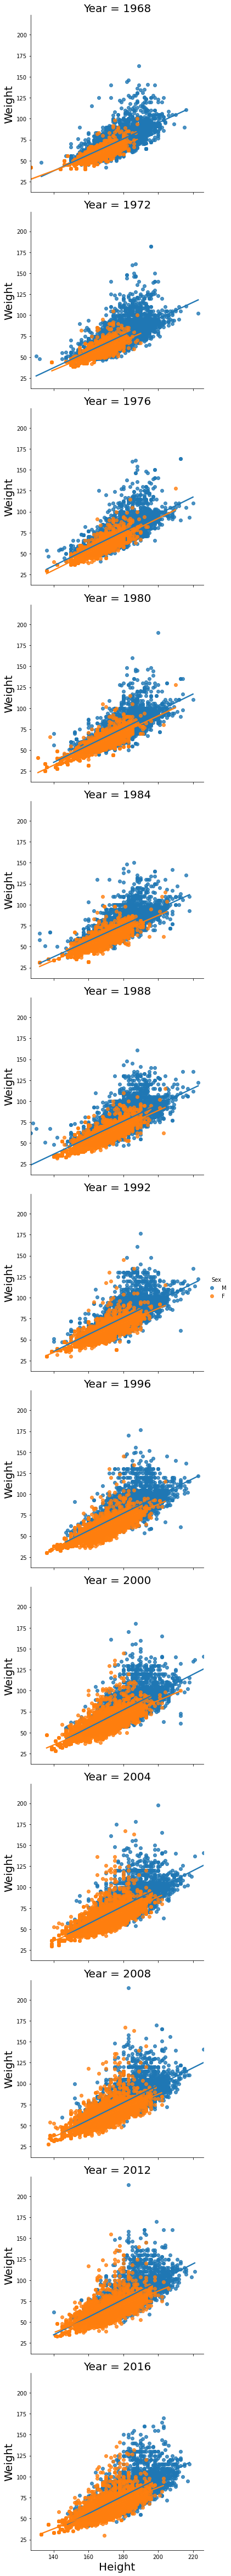

In [38]:
#attempt at linear model plot
sns.lmplot(data=olympics_final, x='Height', y='Weight', hue='Sex', row='Year')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

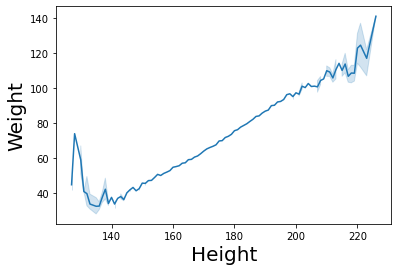

In [39]:
#modelled line plot
sns.lineplot(data=olympics_final, x='Height', y='Weight')

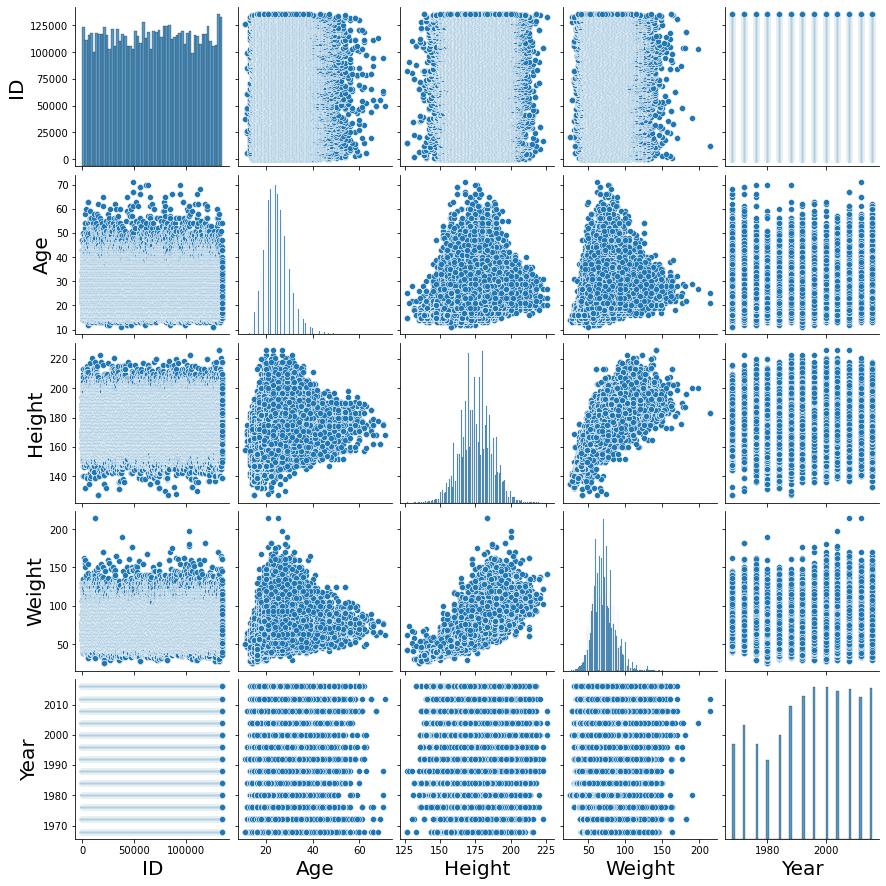

In [40]:
# Correlation
sns.pairplot(olympics_final)

In [ ]:
sns.pairplot(olympics_final, hue='Medal')

In [ ]:
olympics_final.corr()

In [ ]:
sns.heatmap(olympics_final.corr())